In [1]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=68d5e372d2ad87306674cb63abf85efa5a8964e181155976a7c339f7a77624ab
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse
from surprise import accuracy


In [3]:
# Load the MovieLens 100k dataset
data = Dataset.load_builtin('ml-100k')


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


<ipython-input-12-24b42d600703>:10: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


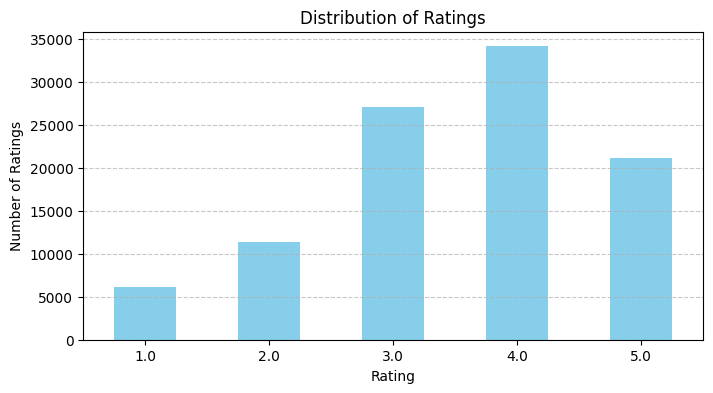

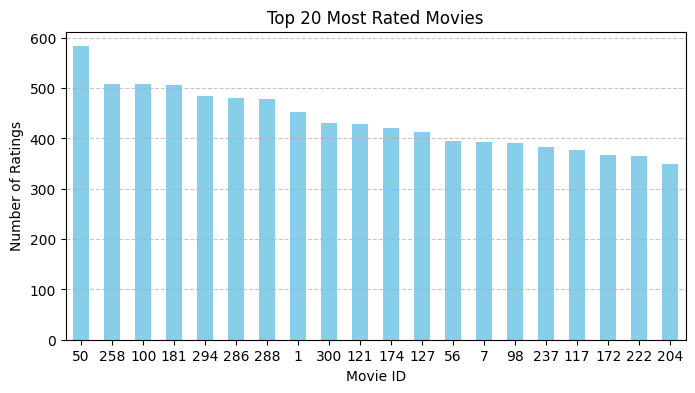

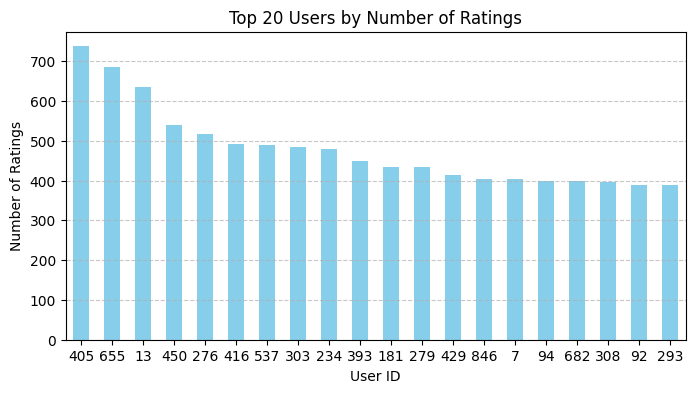

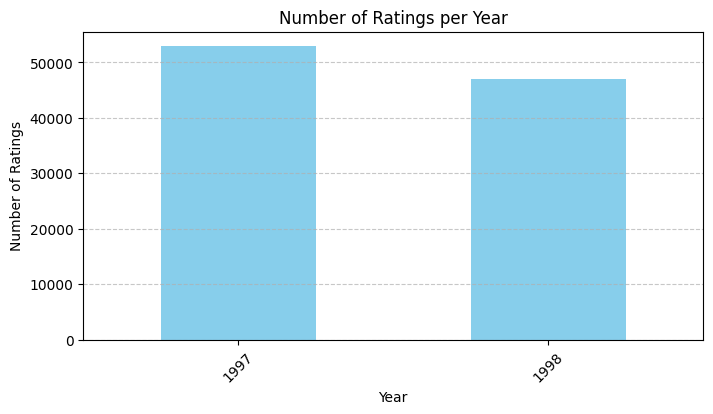

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset

# Load the MovieLens 100k dataset
# data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(data.raw_ratings, columns=["user_id", "item_id", "rating", "timestamp"])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# 1. Rating Distribution
plt.figure(figsize=(8, 4))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Number of Ratings per Movie
plt.figure(figsize=(8, 4))
df['item_id'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Number of Ratings per User
plt.figure(figsize=(8, 4))
df['user_id'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Ratings per Year
df['year'] = df['timestamp'].dt.year
plt.figure(figsize=(8, 4))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
df

,user_id,item_id,rating,timestamp,year
0,196,242,3.0,1997-12-04 15:55:44,1997
1,186,302,3.0,1998-04-04 19:22:40,1998
2,22,377,1.0,1997-11-07 07:18:24,1997
3,244,51,2.0,1997-11-27 05:01:52,1997
4,166,346,1.0,1998-02-02 05:32:48,1998
...,...,...,...,...,...
99995,880,476,3.0,1997-11-22 05:10:24,1997
99996,716,204,5.0,1997-11-17 19:38:40,1997
99997,276,1090,1.0,1997-09-20 22:49:36,1997
99998,13,225,2.0,1997-12-17 22:52:48,1997


In [4]:
# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)


In [5]:
# Use the SVD algorithm
model = SVD()

# Train the model on the training set
model.fit(trainset)


In [6]:
# Predict ratings for the test set
predictions = model.test(testset)

# Calculate RMSE
rmse_value = accuracy.rmse(predictions)


RMSE: 0.9402


In [7]:
# Perform cross-validation
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9359  0.9404  0.9382  0.9300  0.9357  0.9361  0.0035  
MAE (testset)     0.7378  0.7418  0.7394  0.7336  0.7346  0.7374  0.0031  
Fit time          1.34    1.63    1.37    1.36    1.42    1.42    0.11    
Test time         0.11    0.11    0.26    0.13    0.26    0.17    0.07    


{'test_rmse': array([0.93593739, 0.94043181, 0.93821443, 0.93000871, 0.93573621]),
 'test_mae': array([0.73783333, 0.74183268, 0.73944861, 0.73356701, 0.73456231]),
 'fit_time': (1.3388936519622803,
  1.6267099380493164,
  1.3673217296600342,
  1.3589208126068115,
  1.4159798622131348),
 'test_time': (0.1120917797088623,
  0.11310243606567383,
  0.25906848907470703,
  0.12929463386535645,
  0.2582099437713623)}

In [8]:
# Predict a rating for a specific user and item
user_id = str(196)  # user_id should be a string
item_id = str(302)  # item_id (movie id) should be a string

# Get the prediction
prediction = model.predict(user_id, item_id)
print(f"Predicted rating for user {user_id} and movie {item_id}: {prediction.est}")


Predicted rating for user 196 and movie 302: 4.219233490440725


In [9]:
# Function to recommend top N movies for a given user
def get_top_n_recommendations(predictions, n=10):
    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the top n items.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Predict ratings for all pairs (users, items) that are not in the training set
testset_all = trainset.build_anti_testset()
predictions_all = model.test(testset_all)

# Get top 10 movie recommendations for each user
top_n_recommendations = get_top_n_recommendations(predictions_all, n=10)

# Print the recommended movies for a specific user
user_id = str(196)
print(f"Top 10 movie recommendations for user {user_id}:")
for item_id, estimated_rating in top_n_recommendations[user_id]:
    print(f"Movie ID: {item_id}, Predicted Rating: {estimated_rating:.2f}")


Top 10 movie recommendations for user 196:
Movie ID: 318, Predicted Rating: 4.81
Movie ID: 64, Predicted Rating: 4.60
Movie ID: 657, Predicted Rating: 4.56
Movie ID: 427, Predicted Rating: 4.52
Movie ID: 178, Predicted Rating: 4.47
Movie ID: 496, Predicted Rating: 4.45
Movie ID: 127, Predicted Rating: 4.45
Movie ID: 285, Predicted Rating: 4.45
Movie ID: 963, Predicted Rating: 4.43
Movie ID: 408, Predicted Rating: 4.43
